In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./lightning_logs/version_0/metrics.csv')

In [5]:
df

,epoch,step,train_loss,val_loss
0,0,49,0.870266,NaN
1,0,99,1.451252,NaN
2,0,149,0.849177,NaN
3,0,199,1.157822,NaN
4,0,249,1.575374,NaN
...,...,...,...,...
2497,9,124449,0.052266,NaN
2498,9,124499,0.157910,NaN
2499,9,124549,0.130073,NaN
2500,9,124599,0.082089,NaN


In [5]:
train_loss = df['train_loss'].tolist()
val_loss = df['val_loss'].dropna().tolist()

In [6]:
train_loss

[0.8702657222747803,
 1.4512516260147097,
 0.849176824092865,
 1.1578222513198853,
 1.575373649597168,
 1.6592823266983032,
 1.2896853685379028,
 1.206667423248291,
 0.8970766067504883,
 1.587878942489624,
 1.0255318880081177,
 1.1311311721801758,
 1.5889865159988403,
 1.0026979446411133,
 2.077629566192627,
 1.5336111783981323,
 1.824823021888733,
 1.6140763759613037,
 1.2662010192871094,
 1.1613720655441284,
 1.0083861351013184,
 1.2150630950927734,
 1.4301979541778564,
 1.765578269958496,
 1.2710307836532593,
 0.9698983430862428,
 1.1808868646621704,
 1.031989336013794,
 1.3585536479949951,
 1.5923911333084106,
 1.565847396850586,
 1.5265270471572876,
 1.19892680644989,
 1.193636775016785,
 1.474347472190857,
 1.1807535886764526,
 1.0682369470596311,
 1.5422945022583008,
 1.5679283142089844,
 1.3029183149337769,
 1.0774606466293335,
 1.2587788105010986,
 0.9665522575378418,
 1.3838199377059937,
 0.8923523426055908,
 1.409993290901184,
 1.2496519088745115,
 0.6927944421768188,
 1.352

In [7]:
val_loss

[1.3229137659072876,
 1.4497199058532717,
 1.6936750411987305,
 1.9876558780670168,
 2.1942615509033203,
 2.3533778190612793,
 2.47133469581604,
 2.590631008148194,
 2.56624174118042,
 2.6793107986450195]

In [8]:
steps_per_epoch = df[df['val_loss'].isna()].index[1]

In [9]:
steps_per_epoch

1

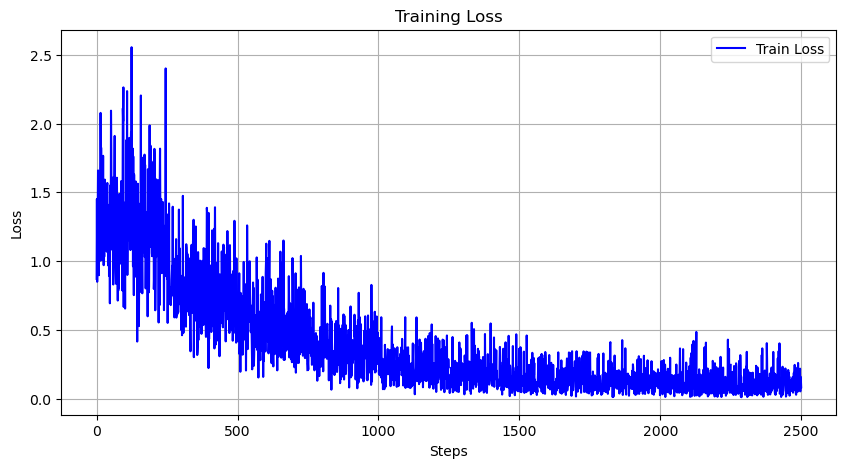

In [16]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Train Loss', color='blue')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid(True)

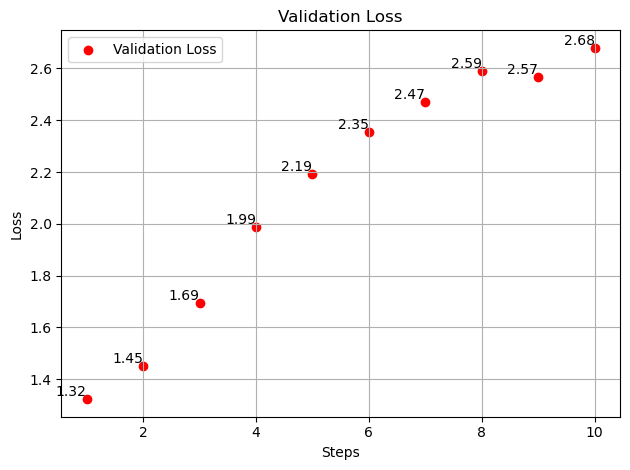

In [17]:
for i, loss in enumerate(val_loss):
    epoch_end_step = (i + 1) * steps_per_epoch
    plt.scatter(epoch_end_step, loss, color='red', label='Validation Loss' if i == 0 else None)
    plt.text(epoch_end_step, loss, f'{loss:.2f}', verticalalignment='bottom', horizontalalignment='right')

plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()